In [33]:
import tensorflow as tf

In [34]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

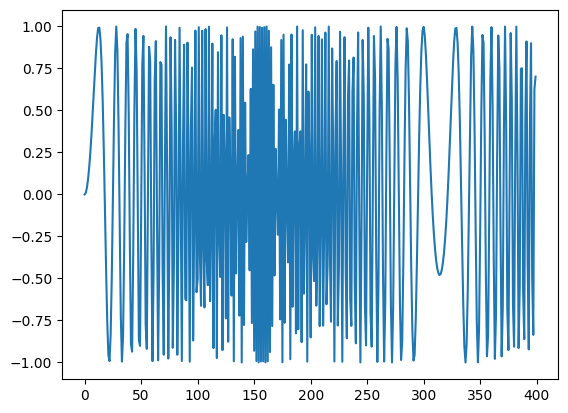

In [36]:
# plot it
plt.plot(series)
plt.show()

In [37]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [38]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 19ms/step - loss: 1.4535 - val_loss: 0.8353
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 1.2594 - val_loss: 0.7203
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0969 - val_loss: 0.6359
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9702 - val_loss: 0.5754
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8653 - val_loss: 0.5411
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7702 - val_loss: 0.5153
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7010 - val_loss: 0.5008
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6531 - val_loss: 0.4939
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6103 - val_loss: 0.4947
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5745 - val_loss: 0.4973
Epoch 11/80
7/7 [=====================

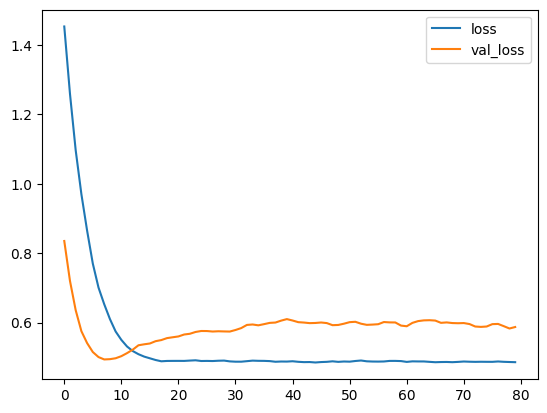

In [39]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 834us/step
(390, 1)


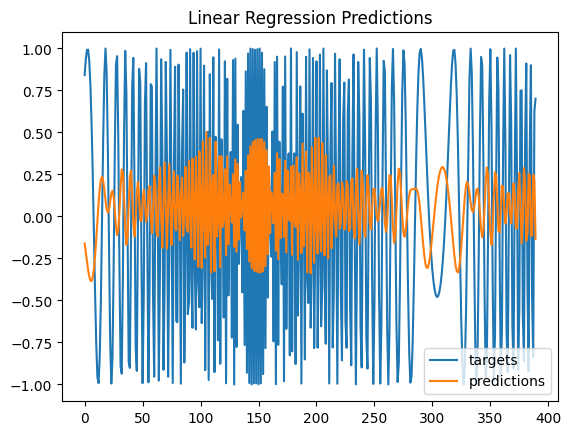

In [40]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

1/1 [==============================] - 0s 15ms/step


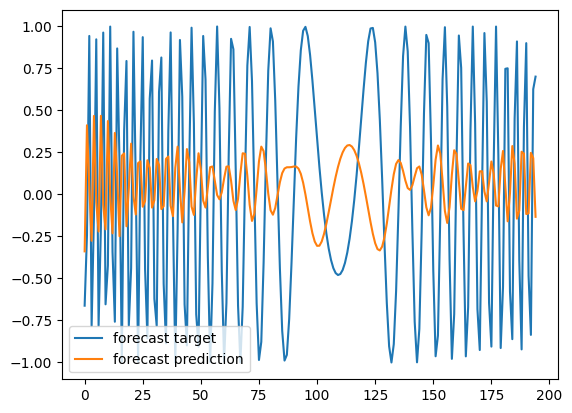

In [41]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

1/1 [==============================] - 0s 15ms/step


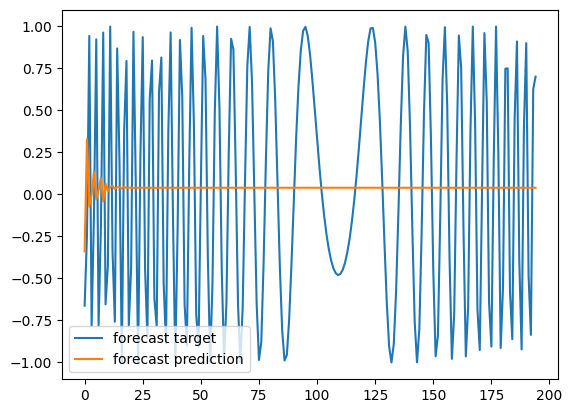

In [42]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [43]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 1s 58ms/step - loss: 0.5291 - val_loss: 0.6039
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4819 - val_loss: 0.5185
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3473 - val_loss: 0.5311
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2808 - val_loss: 0.2774
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1561 - val_loss: 0.2034
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1239 - val_loss: 0.0846
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0827 - val_loss: 0.1036
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0626 - val_loss: 0.1296
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0476 - val_loss: 0.0805
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0347 - val_loss: 0.1024
Epoch 11/200
7/7 [=

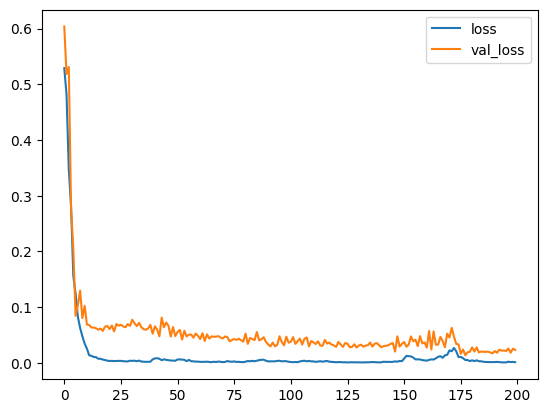

In [44]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


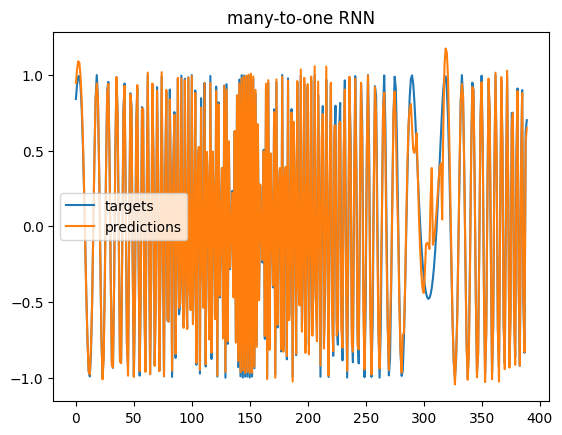

In [45]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


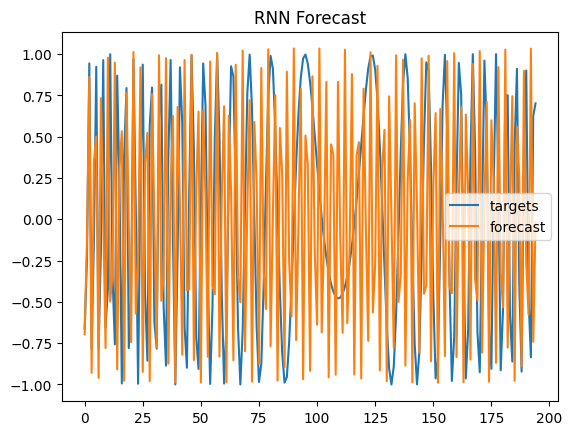

In [46]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()